In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import nltk
import string
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.test.utils import common_texts  # some example sentences
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import PorterStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/promilamalik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Loading data
data = pd.read_csv("amazon_flipkart_data_simple.csv",dtype=str)

In [4]:
punct=string.punctuation

In [5]:
data['Rating'].values

array(['5', '2', '3', ..., '1', '4', '1'], dtype=object)

In [6]:
data

,Website,Items,Brand_name,Product_name,Price,Rating,Review
0,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Good mid- ranger phone
1,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",2,Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K
2,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",3,Not up to the mark
3,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Best phone below 50k hands down..
4,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",1,Seal was broke and cellophane tape was put on it. Poor customer service aswell.
...,...,...,...,...,...,...,...
31971,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Useless product
31972,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",3,Does the job
31973,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Not recommended at all
31974,Flipkart,Home theater,9,"9 TECH NANO 2025 35 W Bluetooth Home Theatre (Black, 2.0 Channel)","1,029",4,Value-for-money


In [7]:
data.shape

(31976, 7)

In [8]:
text=data['Review']
text

0                                                                 Good mid- ranger phone
1                         Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K
2                                                                     Not up to the mark
3                                                      Best phone below 50k hands down..
4        Seal was broke and cellophane tape was put on it. Poor customer service aswell.
                                              ...                                       
31971                                                                    Useless product
31972                                                                       Does the job
31973                                                             Not recommended at all
31974                                                                    Value-for-money
31975                                                                   Terrible product
Name: Review, Length:

In [9]:
def remove_html(text):
    soup=BeautifulSoup(text,'lxml')
    html_free=soup.get_text()
    return html_free

In [10]:
def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct

In [11]:
#data['Review']=data['Review'].apply(lambda x: remove_punctuation)
data['Review'].head()

0                                                             Good mid- ranger phone
1                     Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K
2                                                                 Not up to the mark
3                                                  Best phone below 50k hands down..
4    Seal was broke and cellophane tape was put on it. Poor customer service aswell.
Name: Review, dtype: object

In [12]:
#import tokenizer
tokenizer=RegexpTokenizer(r'\w+')

In [13]:
print(data['Review'].values)


['Good mid- ranger phone'
 'Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K'
 'Not up to the mark' ... 'Not recommended at all' 'Value-for-money'
 'Terrible product']


In [14]:
df_list = data['Review'].values.tolist()
df_list

['Good mid- ranger phone',
 'Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K',
 'Not up to the mark',
 'Best phone below 50k hands down..',
 'Seal was broke and cellophane tape was put on it. Poor customer service aswell.',
 'Waste of money',
 'Some bug and error in phone',
 'Excellent. Value for Money. Can Buy.',
 'Nothing special to boast',
 'Overall Great Phone from Samsung',
 "Don't buy this",
 'Very nice mobile',
 'NOT SATISFIED BY THIS PRODUCT.NOT WORTH FOR MONEY',
 "Don't buy this phone",
 'Simply excellent. Read complete review written after my 30 days of experience',
 'One of the good choice for low budget phone',
 'Amezing One',
 'Poor',
 'Value-For-Money & Recommended for a normal user',
 'BUDGET WORTHY PHONE',
 'Dont buy it as lower model is good then this',
 'Touch & camera quility not good',
 'Call quality bad.manufacturing defects.',
 'Do not buy',
 'Wrist of money and time.',
 'Value for Money',
 'Worst Smart Phone',
 'Happy',
 'Best In Budget',
 'dont bu

In [15]:
data['Review'] = data['Review'].astype('string')

In [16]:
data['Review_new'] = data['Review'].str.split('[') 

In [17]:
text1=data['Review_new']
text1

0                                                                 [Good mid- ranger phone]
1                         [Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K]
2                                                                     [Not up to the mark]
3                                                      [Best phone below 50k hands down..]
4        [Seal was broke and cellophane tape was put on it. Poor customer service aswell.]
                                               ...                                        
31971                                                                    [Useless product]
31972                                                                       [Does the job]
31973                                                             [Not recommended at all]
31974                                                                    [Value-for-money]
31975                                                                   [Terrible product]

In [18]:
stop_words=stopwords.words('english')

In [19]:
cleaned_text=[]

for review_line in data['Review'].values:
    for word in nltk.word_tokenize(review_line):
        if word not in punct:
            if word not in stop_words:
                cleaned_text.append(word)

print('original length',len(text))
print('cleaned text len',len(cleaned_text))
print('\n',cleaned_text)

original length 31976
cleaned text len 116326

 ['Good', 'mid-', 'ranger', 'phone', 'Before', 'buy', 'please', 'aware', 'YOU', 'GON', 'NA', 'GET', 'A', 'CRAP', 'AT', '45K', 'Not', 'mark', 'Best', 'phone', '50k', 'hands', '..', 'Seal', 'broke', 'cellophane', 'tape', 'put', 'Poor', 'customer', 'service', 'aswell', 'Waste', 'money', 'Some', 'bug', 'error', 'phone', 'Excellent', 'Value', 'Money', 'Can', 'Buy', 'Nothing', 'special', 'boast', 'Overall', 'Great', 'Phone', 'Samsung', 'Do', "n't", 'buy', 'Very', 'nice', 'mobile', 'NOT', 'SATISFIED', 'BY', 'THIS', 'PRODUCT.NOT', 'WORTH', 'FOR', 'MONEY', 'Do', "n't", 'buy', 'phone', 'Simply', 'excellent', 'Read', 'complete', 'review', 'written', '30', 'days', 'experience', 'One', 'good', 'choice', 'low', 'budget', 'phone', 'Amezing', 'One', 'Poor', 'Value-For-Money', 'Recommended', 'normal', 'user', 'BUDGET', 'WORTHY', 'PHONE', 'Dont', 'buy', 'lower', 'model', 'good', 'Touch', 'camera', 'quility', 'good', 'Call', 'quality', 'bad.manufacturing', '

In [20]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

In [21]:
lam_text = []
for text in data['Review']:
    x = lemmatize_word(text)
    lemm = " ".join(x)
    lam_text.append(lemm)

In [22]:
data['Review'].value_counts()

Wonderful                                                368
Good                                                     313
Excellent                                                304
Great product                                            304
Awesome                                                  286
                                                        ... 
not similar to hp or better than hp.                       1
Just an average device, should be fine for daily use.      1
I am loving it                                             1
Plz dnt buy, tryin 2 save u, nt ur mony nt ur time.        1
Woofer sound quality need to be more good.                 1
Name: Review, Length: 10766, dtype: Int64

In [23]:
data['Rating'].value_counts()

5    15375
1     7740
4     4796
3     2493
2     1572
Name: Rating, dtype: int64

In [24]:
data.isnull().sum()

Website         0
Items           0
Brand_name      0
Product_name    0
Price           0
Rating          0
Review          0
Review_new      0
dtype: int64

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from nltk.stem import PorterStemmer 

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
import os
import math

import warnings
warnings.filterwarnings('ignore')

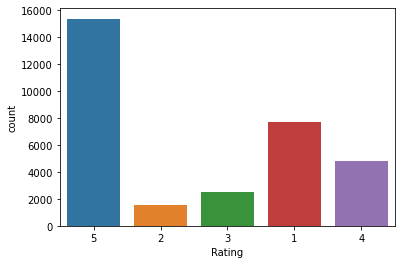

In [26]:
sns.countplot(data['Rating'])
plt.show()

In [27]:
def createWrdCloudForSentiment(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['Rating']==sentiments]
    words = " ".join(temp_df['Review'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_text)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

In [28]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForTitle(sentiments,new_df):
    #sentiment_num = 1 if sentiment== 1 else 0
    temp_df = new_df[new_df['Rating']==sentiments]
    words = " ".join(temp_df['Reviews'])
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT' and type(w) == str])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1500,
                      height=1000).generate(cleaned_text)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

In [29]:
## Tokenize Sentences based on \n character ##
data['Review1'] = data['Review'].apply(lambda row: row.splitlines())

In [30]:
## Tokenize Words ##
data['Review2'] = data['Review'].apply(lambda row: [nltk.word_tokenize(i) for i in row])

In [31]:
## Remove empty elements in list of list ##
data['Review3'] = data['Review'].apply(lambda row: [x for x in row if x])

In [32]:
data.head()

,Website,Items,Brand_name,Product_name,Price,Rating,Review,Review_new,Review1,Review2,Review3
0,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Good mid- ranger phone,[Good mid- ranger phone],[Good mid- ranger phone],"[[G], [o], [o], [d], [], [m], [i], [d], [-], [], [r], [a], [n], [g], [e], [r], [], [p], [h], [o]...","[G, o, o, d, , m, i, d, -, , r, a, n, g, e, r, , p, h, o, n, e]"
1,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",2,Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K,[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],"[[B], [e], [f], [o], [r], [e], [], [y], [o], [u], [], [b], [u], [y], [], [-], [], [p], [l], [e],...","[B, e, f, o, r, e, , y, o, u, , b, u, y, , -, , p, l, e, a, s, e, , b, e, , a, w, a, r, e,..."
2,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",3,Not up to the mark,[Not up to the mark],[Not up to the mark],"[[N], [o], [t], [], [u], [p], [], [t], [o], [], [t], [h], [e], [], [m], [a], [r], [k]]","[N, o, t, , u, p, , t, o, , t, h, e, , m, a, r, k]"
3,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Best phone below 50k hands down..,[Best phone below 50k hands down..],[Best phone below 50k hands down..],"[[B], [e], [s], [t], [], [p], [h], [o], [n], [e], [], [b], [e], [l], [o], [w], [], [5], [0], [k]...","[B, e, s, t, , p, h, o, n, e, , b, e, l, o, w, , 5, 0, k, , h, a, n, d, s, , d, o, w, n, ., .]"
4,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",1,Seal was broke and cellophane tape was put on it. Poor customer service aswell.,[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],"[[S], [e], [a], [l], [], [w], [a], [s], [], [b], [r], [o], [k], [e], [], [a], [n], [d], [], [c],...","[S, e, a, l, , w, a, s, , b, r, o, k, e, , a, n, d, , c, e, l, l, o, p, h, a, n, e, , t, a,..."


In [33]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [34]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['cleanText']=data['Review'].map(lambda s:preprocess(s)) 

In [35]:
data

,Website,Items,Brand_name,Product_name,Price,Rating,Review,Review_new,Review1,Review2,Review3,cleanText
0,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Good mid- ranger phone,[Good mid- ranger phone],[Good mid- ranger phone],"[[G], [o], [o], [d], [], [m], [i], [d], [-], [], [r], [a], [n], [g], [e], [r], [], [p], [h], [o]...","[G, o, o, d, , m, i, d, -, , r, a, n, g, e, r, , p, h, o, n, e]",good mid ranger phone
1,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",2,Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K,[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],"[[B], [e], [f], [o], [r], [e], [], [y], [o], [u], [], [b], [u], [y], [], [-], [], [p], [l], [e],...","[B, e, f, o, r, e, , y, o, u, , b, u, y, , -, , p, l, e, a, s, e, , b, e, , a, w, a, r, e,...",buy please aware gonna get crap
2,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",3,Not up to the mark,[Not up to the mark],[Not up to the mark],"[[N], [o], [t], [], [u], [p], [], [t], [o], [], [t], [h], [e], [], [m], [a], [r], [k]]","[N, o, t, , u, p, , t, o, , t, h, e, , m, a, r, k]",mark
3,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Best phone below 50k hands down..,[Best phone below 50k hands down..],[Best phone below 50k hands down..],"[[B], [e], [s], [t], [], [p], [h], [o], [n], [e], [], [b], [e], [l], [o], [w], [], [5], [0], [k]...","[B, e, s, t, , p, h, o, n, e, , b, e, l, o, w, , 5, 0, k, , h, a, n, d, s, , d, o, w, n, ., .]",best phone hands
4,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",1,Seal was broke and cellophane tape was put on it. Poor customer service aswell.,[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],"[[S], [e], [a], [l], [], [w], [a], [s], [], [b], [r], [o], [k], [e], [], [a], [n], [d], [], [c],...","[S, e, a, l, , w, a, s, , b, r, o, k, e, , a, n, d, , c, e, l, l, o, p, h, a, n, e, , t, a,...",seal broke cellophane tape put poor customer service aswell
...,...,...,...,...,...,...,...,...,...,...,...,...
31971,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Useless product,[Useless product],[Useless product],"[[U], [s], [e], [l], [e], [s], [s], [], [p], [r], [o], [d], [u], [c], [t]]","[U, s, e, l, e, s, s, , p, r, o, d, u, c, t]",useless product
31972,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",3,Does the job,[Does the job],[Does the job],"[[D], [o], [e], [s], [], [t], [h], [e], [], [j], [o], [b]]","[D, o, e, s, , t, h, e, , j, o, b]",job
31973,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Not recommended at all,[Not recommended at all],[Not recommended at all],"[[N], [o], [t], [], [r], [e], [c], [o], [m], [m], [e], [n], [d], [e], [d], [], [a], [t], [], [a]...","[N, o, t, , r, e, c, o, m, m, e, n, d, e, d, , a, t, , a, l, l]",recommended
31974,Flipkart,Home theater,9,"9 TECH NANO 2025 35 W Bluetooth Home Theatre (Black, 2.0 Channel)","1,029",4,Value-for-money,[Value-for-money],[Value-for-money],"[[V], [a], [l], [u], [e], [-], [f], [o], [r], [-], [m], [o], [n], [e], [y]]","[V, a, l, u, e, -, f, o, r, -, m, o, n, e, y]",value money


In [36]:
data['reviews']=data['cleanText']

In [37]:
data

,Website,Items,Brand_name,Product_name,Price,Rating,Review,Review_new,Review1,Review2,Review3,cleanText,reviews
0,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Good mid- ranger phone,[Good mid- ranger phone],[Good mid- ranger phone],"[[G], [o], [o], [d], [], [m], [i], [d], [-], [], [r], [a], [n], [g], [e], [r], [], [p], [h], [o]...","[G, o, o, d, , m, i, d, -, , r, a, n, g, e, r, , p, h, o, n, e]",good mid ranger phone,good mid ranger phone
1,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",2,Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K,[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],[Before you buy - please be aware - YOU GONNA GET A CRAP AT 45K],"[[B], [e], [f], [o], [r], [e], [], [y], [o], [u], [], [b], [u], [y], [], [-], [], [p], [l], [e],...","[B, e, f, o, r, e, , y, o, u, , b, u, y, , -, , p, l, e, a, s, e, , b, e, , a, w, a, r, e,...",buy please aware gonna get crap,buy please aware gonna get crap
2,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",3,Not up to the mark,[Not up to the mark],[Not up to the mark],"[[N], [o], [t], [], [u], [p], [], [t], [o], [], [t], [h], [e], [], [m], [a], [r], [k]]","[N, o, t, , u, p, , t, o, , t, h, e, , m, a, r, k]",mark,mark
3,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,Best phone below 50k hands down..,[Best phone below 50k hands down..],[Best phone below 50k hands down..],"[[B], [e], [s], [t], [], [p], [h], [o], [n], [e], [], [b], [e], [l], [o], [w], [], [5], [0], [k]...","[B, e, s, t, , p, h, o, n, e, , b, e, l, o, w, , 5, 0, k, , h, a, n, d, s, , d, o, w, n, ., .]",best phone hands,best phone hands
4,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",1,Seal was broke and cellophane tape was put on it. Poor customer service aswell.,[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],[Seal was broke and cellophane tape was put on it. Poor customer service aswell.],"[[S], [e], [a], [l], [], [w], [a], [s], [], [b], [r], [o], [k], [e], [], [a], [n], [d], [], [c],...","[S, e, a, l, , w, a, s, , b, r, o, k, e, , a, n, d, , c, e, l, l, o, p, h, a, n, e, , t, a,...",seal broke cellophane tape put poor customer service aswell,seal broke cellophane tape put poor customer service aswell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31971,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Useless product,[Useless product],[Useless product],"[[U], [s], [e], [l], [e], [s], [s], [], [p], [r], [o], [d], [u], [c], [t]]","[U, s, e, l, e, s, s, , p, r, o, d, u, c, t]",useless product,useless product
31972,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",3,Does the job,[Does the job],[Does the job],"[[D], [o], [e], [s], [], [t], [h], [e], [], [j], [o], [b]]","[D, o, e, s, , t, h, e, , j, o, b]",job,job
31973,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,Not recommended at all,[Not recommended at all],[Not recommended at all],"[[N], [o], [t], [], [r], [e], [c], [o], [m], [m], [e], [n], [d], [e], [d], [], [a], [t], [], [a]...","[N, o, t, , r, e, c, o, m, m, e, n, d, e, d, , a, t, , a, l, l]",recommended,recommended
31974,Flipkart,Home theater,9,"9 TECH NANO 2025 35 W Bluetooth Home Theatre (Black, 2.0 Channel)","1,029",4,Value-for-money,[Value-for-money],[Value-for-money],"[[V], [a], [l], [u], [e], [-], [f], [o], [r], [-], [m], [o], [n], [e], [y]]","[V, a, l, u, e, -, f, o, r, -, m, o, n, e, y]",value money,value money


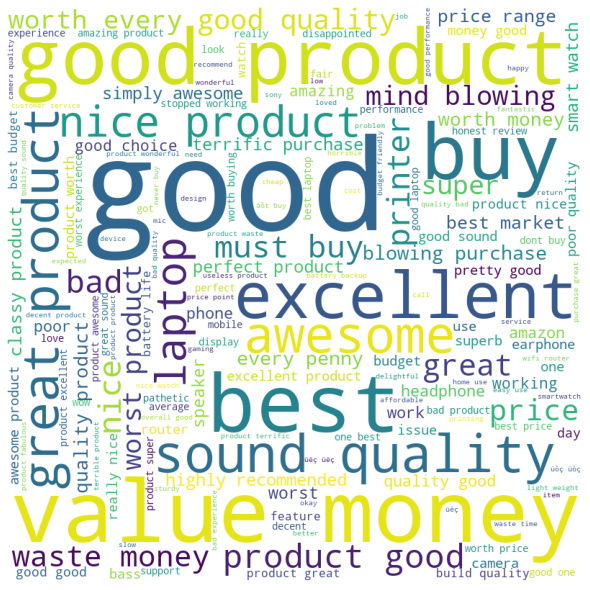

In [38]:
#createWrdCloudForSentiment(5.0,data)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

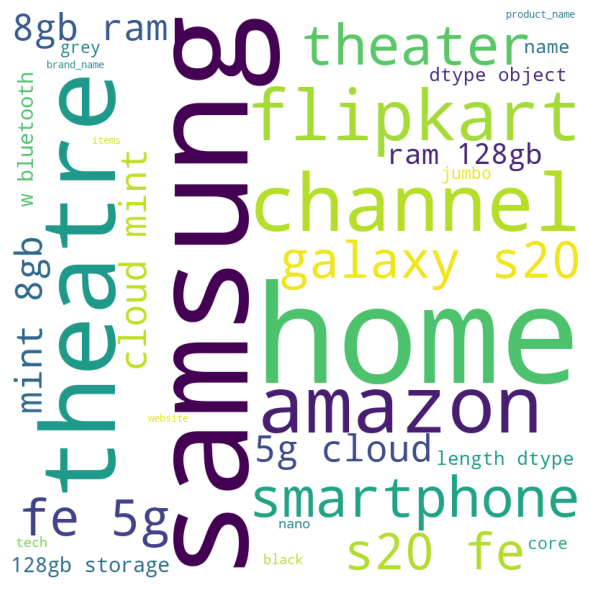

In [39]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Product_name,data.Website,data.Items,data.Brand_name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

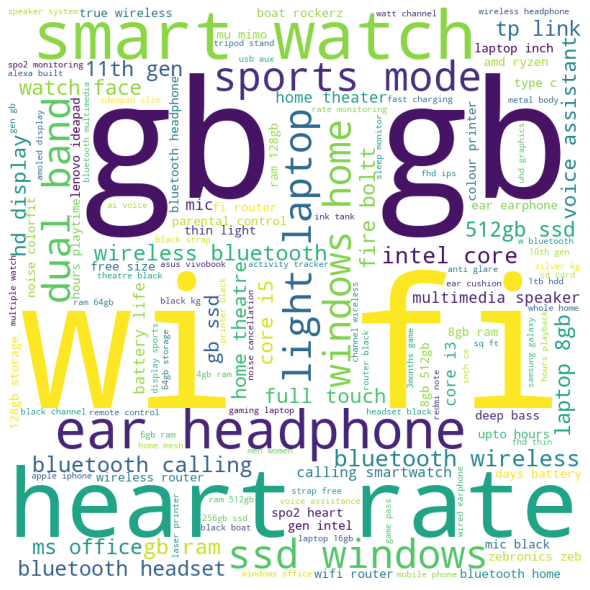

In [40]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Product_name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

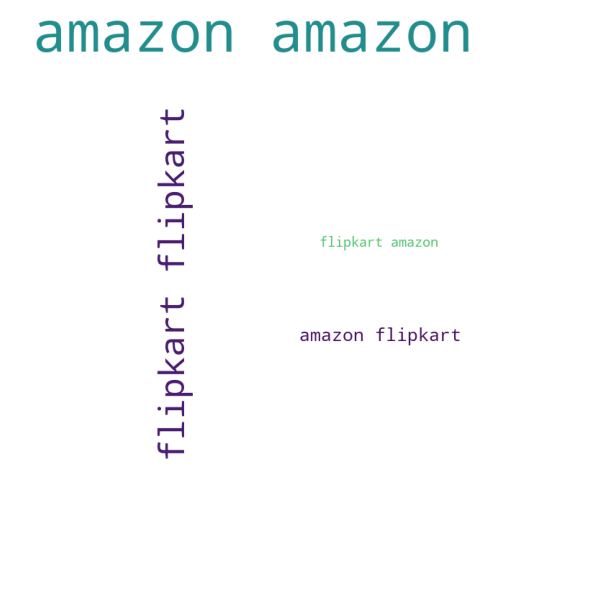

In [41]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Website:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

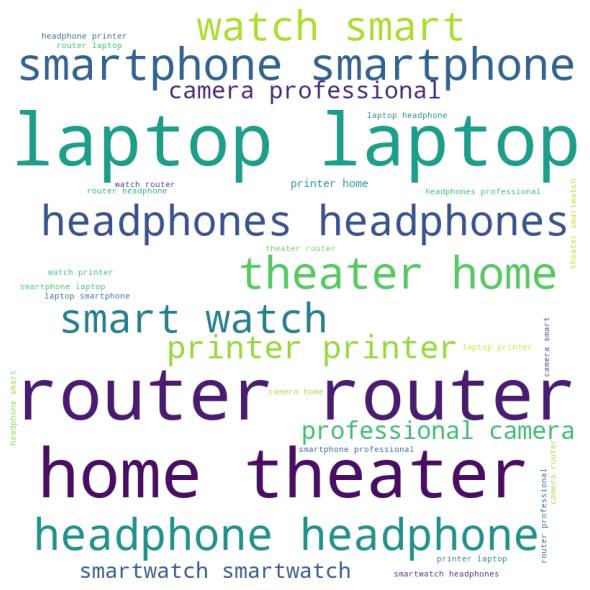

In [42]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Items:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

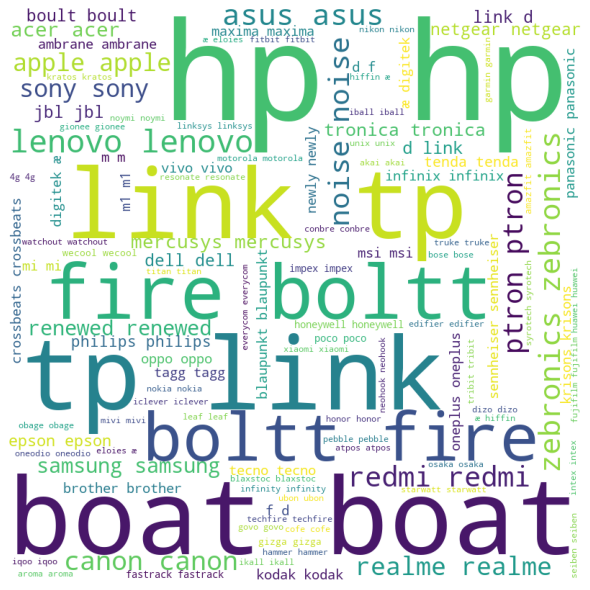

In [43]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Brand_name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# TSNE Visualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

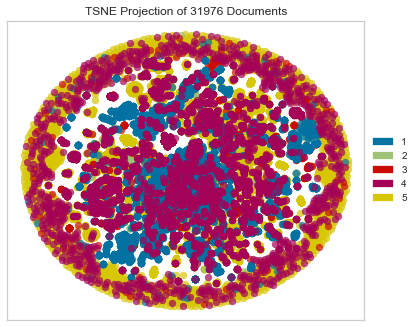

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer(ngram_range=(1,2))

X = tfidf.fit_transform(data['reviews'])
y = data['Rating']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [45]:
sentiment = []

for i in data['Rating'].values:
    if i == 1 or i == 2:
        sentiment.append(0)
    else:
        sentiment.append(1)

data['sentiment'] = sentiment

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


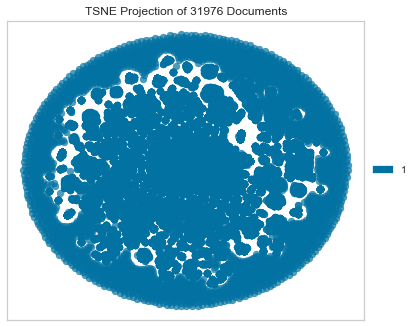

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['reviews'])
y = data['sentiment']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
plt.show()

In [47]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

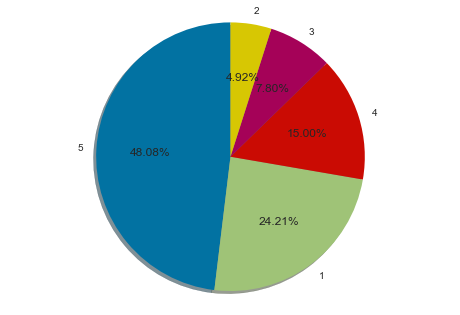

In [48]:
createPieChartFor(data['Rating'])


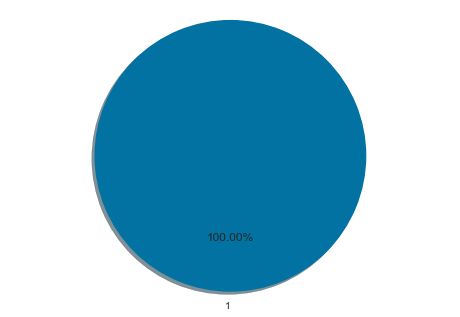

In [49]:
createPieChartFor(data['sentiment'])

# Feature Extraction

In [50]:
data.drop(['Review','Review_new','Review1','Review2','Review3','cleanText'], axis=1, inplace=True)

In [51]:
data

,Website,Items,Brand_name,Product_name,Price,Rating,reviews,sentiment
0,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,good mid ranger phone,1
1,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",2,buy please aware gonna get crap,1
2,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",3,mark,1
3,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",5,best phone hands,1
4,Amazon,SmartPhone,Samsung,"Samsung Galaxy S20 FE 5G (Cloud Mint, 8GB RAM, 128GB Storage)","39,990",1,seal broke cellophane tape put poor customer service aswell,1
...,...,...,...,...,...,...,...,...
31971,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,useless product,1
31972,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",3,job,1
31973,Flipkart,Home theater,9,"9 CORE Jumbo 9500 W Bluetooth Home Theatre (Grey, 5.1 Channel)","4,170",1,recommended,1
31974,Flipkart,Home theater,9,"9 TECH NANO 2025 35 W Bluetooth Home Theatre (Black, 2.0 Channel)","1,029",4,value money,1


# Feature Extraction

In [52]:
#data.to_csv('data.csv',index = False)

In [53]:
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data['reviews'])

In [54]:
X = data['reviews']
y = data['Rating'].values

In [55]:
print("shape of X is :",X.shape)
print("shape of y is :",y.shape)

shape of X is : (31976,)
shape of y is : (31976,)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(X_train)
test_tfidf_model = vectorizer.transform(X_test)
train_tfidf = pd.DataFrame(train_tfidf_model)
test_tfidf = pd.DataFrame(test_tfidf_model)


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=1000),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [61]:
lbl_actual = y_test
i = 0
accuracy = []
models = []
for cl in cls:
    model = cl.fit(train_tfidf_model,y_train)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    models.append(model)
    i +=1

LogisticRegression  Accuracy Score : 75.59%
              precision    recall  f1-score   support

           1       0.87      0.73      0.80      2251
           2       0.31      0.82      0.45       148
           3       0.33      0.70      0.45       308
           4       0.36      0.69      0.47       597
           5       0.93      0.78      0.85      4690

    accuracy                           0.76      7994
   macro avg       0.56      0.75      0.60      7994
weighted avg       0.84      0.76      0.78      7994

MultinomialNB  Accuracy Score : 72.79%
              precision    recall  f1-score   support

           1       0.83      0.72      0.77      2203
           2       0.15      0.89      0.26        66
           3       0.22      0.82      0.34       171
           4       0.27      0.77      0.40       402
           5       0.96      0.72      0.82      5152

    accuracy                           0.73      7994
   macro avg       0.48      0.78      0.52     

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(train_tfidf_model,y_train)
pred_1 = nb.predict(test_tfidf_model)
print("The Accuracy score of MultinomialNB Classification is",round(accuracy_score(y_test, pred_1)*100,4),"%")

The Accuracy score of MultinomialNB Classification is 72.7921 %


In [63]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, pred_1))

-------------Classification Report -----------------
              precision    recall  f1-score   support

           1       0.72      0.83      0.77      1900
           2       0.89      0.15      0.26       396
           3       0.82      0.22      0.34       649
           4       0.77      0.27      0.40      1153
           5       0.72      0.96      0.82      3896

    accuracy                           0.73      7994
   macro avg       0.78      0.48      0.52      7994
weighted avg       0.74      0.73      0.68      7994



In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data['reviews'])

#X = features
#y = data['Rating']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=89)

*******************RESULTS*******************
The accuracy score of train is : 78.98851807175087
The accuracy score test is : 74.9921817992286
The cross validation score is : 74.16786482713853
Confusion Matrix: 
 [[2008    9   20   24  238]
 [ 200  126   16   10   89]
 [ 198    3  231   27  279]
 [ 114    4   38  481  799]
 [ 154    5   26  146 4348]]
Classification                precision    recall  f1-score   support

           1       0.75      0.87      0.81      2299
           2       0.86      0.29      0.43       441
           3       0.70      0.31      0.43       738
           4       0.70      0.33      0.45      1436
           5       0.76      0.93      0.83      4679

    accuracy                           0.75      9593
   macro avg       0.75      0.55      0.59      9593
weighted avg       0.75      0.75      0.72      9593

***********************************************


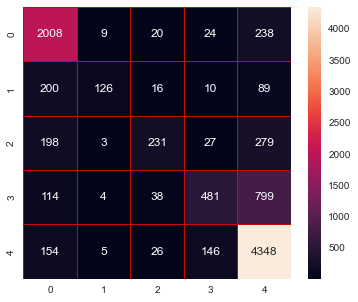

In [75]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 91.98498860742528
The accuracy score test is : 83.09183779839466
The cross validation score is : 81.48595153104048
Confusion Matrix: 
 [[2038   20   25   30  186]
 [  79  286   13   10   53]
 [  96    3  445   31  163]
 [  62    7   27  836  504]
 [ 107    9   29  168 4366]]
Classification                precision    recall  f1-score   support

           1       0.86      0.89      0.87      2299
           2       0.88      0.65      0.75       441
           3       0.83      0.60      0.70       738
           4       0.78      0.58      0.67      1436
           5       0.83      0.93      0.88      4679

    accuracy                           0.83      9593
   macro avg       0.83      0.73      0.77      9593
weighted avg       0.83      0.83      0.82      9593

***********************************************


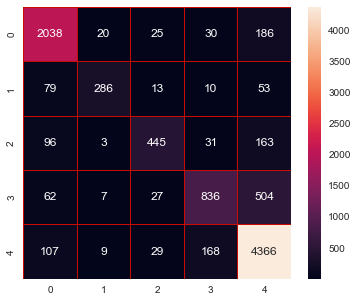

In [76]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 91.98498860742528
The accuracy score test is : 81.69498592723862
The cross validation score is : 80.19032636873241
Confusion Matrix: 
 [[1986   32   38   53  190]
 [  73  283   19   18   48]
 [  78   11  454   47  148]
 [  68   11   37  866  454]
 [ 136   19   48  228 4248]]
Classification                precision    recall  f1-score   support

           1       0.85      0.86      0.86      2299
           2       0.79      0.64      0.71       441
           3       0.76      0.62      0.68       738
           4       0.71      0.60      0.65      1436
           5       0.83      0.91      0.87      4679

    accuracy                           0.82      9593
   macro avg       0.79      0.73      0.75      9593
weighted avg       0.81      0.82      0.81      9593

***********************************************


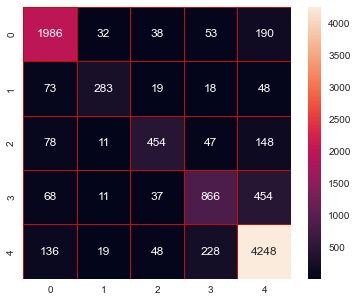

In [77]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred_train = dec_clf.predict(X_train)
y_pred = dec_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(dec_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 80.09650180940892
The accuracy score test is : 72.21932659230689
The cross validation score is : 69.96378072176267
Confusion Matrix: 
 [[1760   59   71   84  325]
 [ 125  171   29   20   96]
 [ 141   11  335   40  211]
 [ 136   21   58  691  530]
 [ 315   35  113  245 3971]]
Classification                precision    recall  f1-score   support

           1       0.71      0.77      0.74      2299
           2       0.58      0.39      0.46       441
           3       0.55      0.45      0.50       738
           4       0.64      0.48      0.55      1436
           5       0.77      0.85      0.81      4679

    accuracy                           0.72      9593
   macro avg       0.65      0.59      0.61      9593
weighted avg       0.71      0.72      0.71      9593

***********************************************


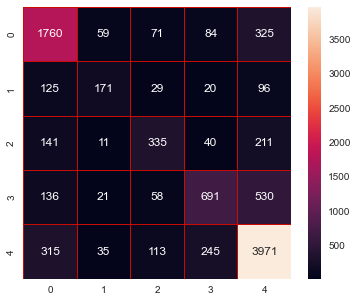

In [78]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 88.11151320198366
The accuracy score test is : 81.02783279474617
The cross validation score is : 79.59164036302715
Confusion Matrix: 
 [[2052   14   17   15  201]
 [ 134  206   12    9   80]
 [ 129    0  368   20  221]
 [  75    4   20  668  669]
 [  99    4   20   77 4479]]
Classification                precision    recall  f1-score   support

           1       0.82      0.89      0.86      2299
           2       0.90      0.47      0.62       441
           3       0.84      0.50      0.63       738
           4       0.85      0.47      0.60      1436
           5       0.79      0.96      0.87      4679

    accuracy                           0.81      9593
   macro avg       0.84      0.66      0.71      9593
weighted avg       0.82      0.81      0.79      9593

***********************************************


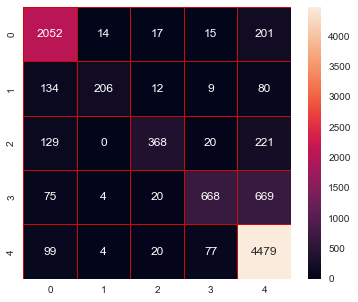

In [80]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_train = svm_clf.predict(X_train)
y_pred = svm_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(svm_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

# Hyper parameter tuning


In [81]:
param_grid = [
    {"n_estimators": range(20, 100, 2),  
     "max_depth": [1, 2, 4, 6, 9, 12],
     "min_samples_split": [2, 6, 8],
     "min_samples_leaf": [1, 2, 3],
     }
]


ran_clf  =  RandomForestClassifier(random_state = 89)
rf_grid = GridSearchCV(ran_clf,param_grid,cv = 2,)
rf_grid.fit(X_train,y_train)
params = rf_grid.best_params_
print("Best Params  ",params) 

Best Params   {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 22}


In [82]:
rand_clfr = RandomForestClassifier(n_estimators = 26,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=12,
                                 criterion='entropy',bootstrap = True)
rand_clfr.fit(X_train,y_train)
rf_pred = rand_clfr.predict(X_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(y_test, rf_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(y_test, rf_pred))
print('\n')
print('Classification Report of Random Forest Classifier: ',classification_report(y_test, rf_pred))

Final Random Forest Classifier Model
Accuracy Score : 0.5218388408214323


Confusion matrix of Random Forest Classifier : [[ 334    0    0    0 1965]
 [  12    0    0    0  429]
 [  14    0    0    0  724]
 [   1    0    0    0 1435]
 [   7    0    0    0 4672]]


Classification Report of Random Forest Classifier:                precision    recall  f1-score   support

           1       0.91      0.15      0.25      2299
           2       0.00      0.00      0.00       441
           3       0.00      0.00      0.00       738
           4       0.00      0.00      0.00      1436
           5       0.51      1.00      0.67      4679

    accuracy                           0.52      9593
   macro avg       0.28      0.23      0.18      9593
weighted avg       0.46      0.52      0.39      9593



In [66]:
X_train1 = train_tfidf_model.toarray().astype(int)
X_test1 = test_tfidf_model.toarray().astype(int)

In [ ]:
data.dtypes

In [ ]:
#data["Rating"] = data["Rating"].convert_objects(convert_numeric=True)

In [ ]:
#data['Rating'] = data['Rating'].values.map(lambda x: float(x))

In [84]:
from sklearn.metrics import classification_report
print("-------------Classification Report -----------------")
print(classification_report(y_test, y_pred))
X_train = train_tfidf_model
X_test = test_tfidf_model

-------------Classification Report -----------------
              precision    recall  f1-score   support

           1       0.82      0.89      0.86      2299
           2       0.90      0.47      0.62       441
           3       0.84      0.50      0.63       738
           4       0.85      0.47      0.60      1436
           5       0.79      0.96      0.87      4679

    accuracy                           0.81      9593
   macro avg       0.84      0.66      0.71      9593
weighted avg       0.82      0.81      0.79      9593



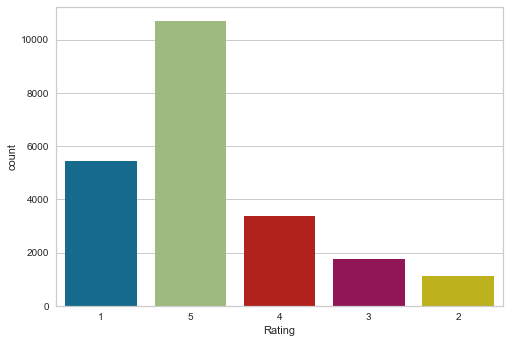

In [90]:
import seaborn as sns
sns.countplot(y_train)
plt.show()

# Saving the best Model

In [101]:
import pickle
filename = 'Rating_Prediction.pkl'
pickle.dump(rf_pred,open(filename,'wb'))

In [103]:
import numpy as np
a=np.array(y_test)
predicted= np.array(rf_pred)
rf_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
rf_com

,original,predicted
0,2,5
1,5,5
2,3,5
3,3,5
4,1,1
...,...,...
9588,1,5
9589,1,1
9590,5,5
9591,5,5
